In [1]:
#we should crete the best fit line which passes throught the data points
#best fit line is the line which means the error is min
#error=actual-predicted
#cost fun=1/2m (y-y^)2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv('New_Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df.shape

(1338, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
df.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [10]:
col=list(df.columns)

In [11]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [13]:
for col_name in col:
    if df[col_name].dtype=='object':
        df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
    else:
        df[col_name]=df[col_name].fillna(df[col_name].mean())

In [14]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

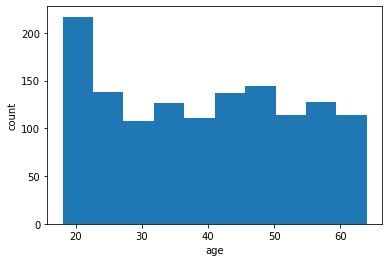

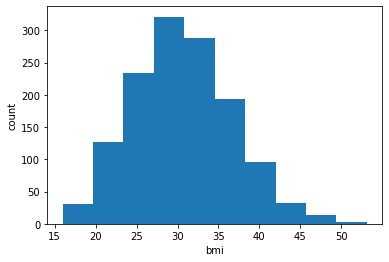

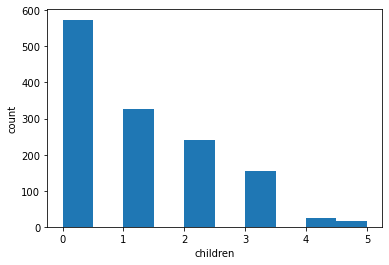

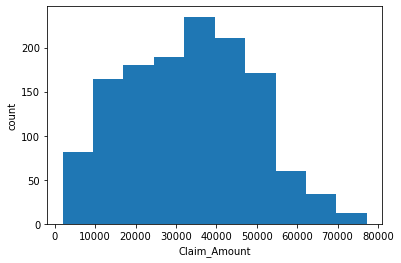

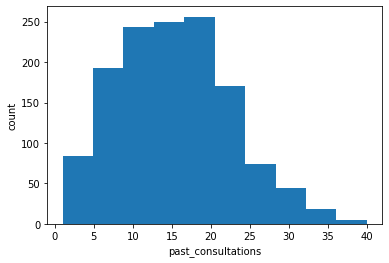

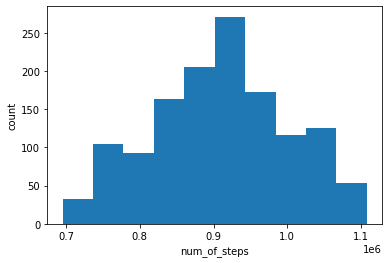

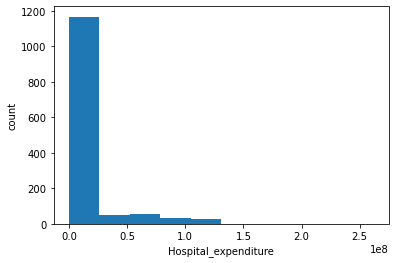

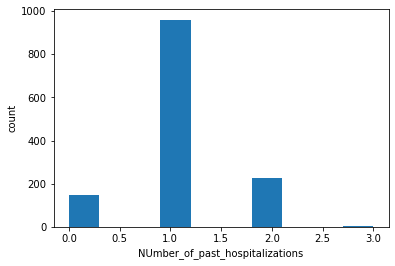

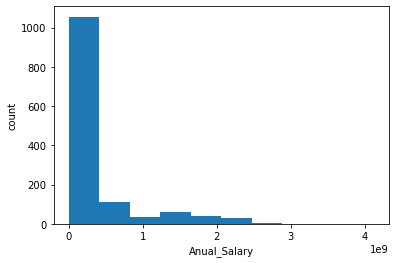

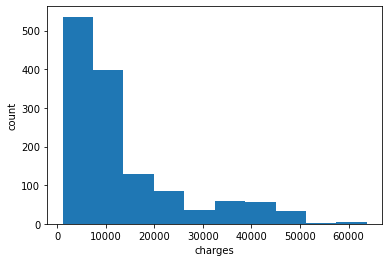

In [16]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.hist(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [19]:
#outliers

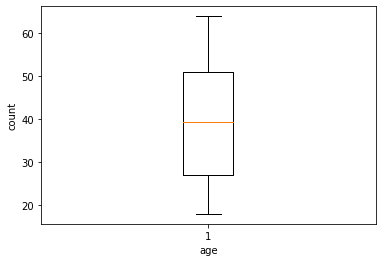

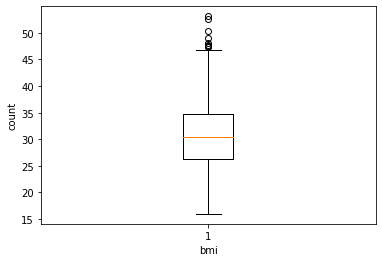

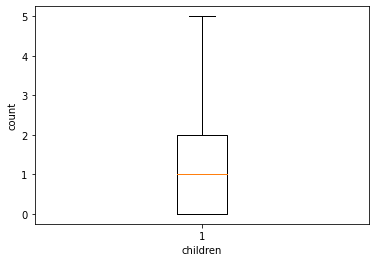

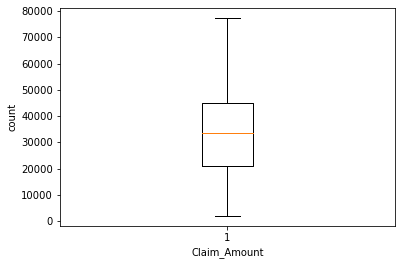

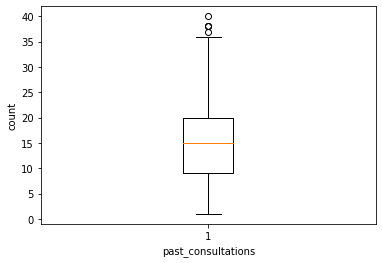

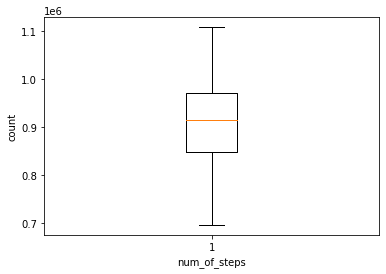

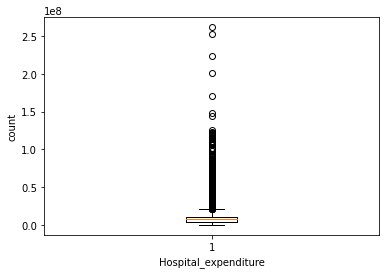

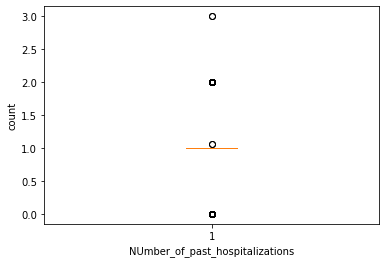

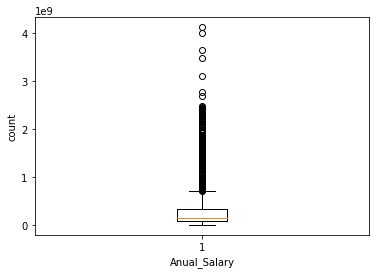

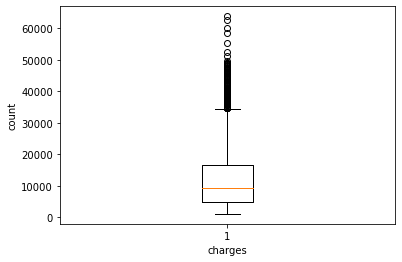

In [18]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [20]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1.338000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,13.987500,6.094840,1.199606,15535.307255,7.450948,9.178297e+04,2.665309e+07,0.533184,5.656109e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.315000,0.000000,20947.645198,9.000000,8.474898e+05,4.084941e+06,1.000000,7.755085e+07,4740.287150
50%,39.310008,30.400000,1.000000,33611.286065,15.000000,9.140155e+05,7.500985e+06,1.000000,1.422756e+08,9382.033000
75%,51.000000,34.656250,2.000000,44978.873188,20.000000,9.715100e+05,1.090187e+07,1.000000,3.298713e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [21]:
#treating outliers

In [23]:

Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bmi >= Q1 - 1.5*IQR) & (df.bmi <= Q3 + 1.5*IQR)]

Q1 = df.past_consultations.quantile(0.25)
Q3 = df.past_consultations.quantile(0.75)
IQR = Q3 - Q1
df= df[(df.past_consultations >= Q1 - 1.5*IQR) & (df.past_consultations <= Q3 + 1.5*IQR)]

Q1 = df.Hospital_expenditure.quantile(0.25)
Q3 = df.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Hospital_expenditure >= Q1 - 1.5*IQR) & (df.Hospital_expenditure <= Q3 + 1.5*IQR)]

Q1 = df.Anual_Salary.quantile(0.25)
Q3 = df.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.Anual_Salary >= Q1 - 1.5*IQR) & (df.Anual_Salary <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9440d0ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b944074fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9440d0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b944074cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b94405f250>],
 'means': []}

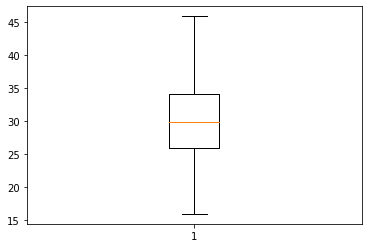

In [24]:
plt.boxplot(df['bmi'])

In [25]:
#vif: basically we use vif to measure the multicollinarity between columns
#multicolinearity means if 2 features are similar for ex age and dob.


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):#only num cols except for the charges column
        col_list.append(col)

In [27]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [29]:
X = df[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
1041,24.0,27.600,0.0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [30]:
X.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [3.10000000e+01, 2.98100000e+01, 0.00000000e+00, ...,
        1.02899068e+07, 1.00000000e+00, 3.74530951e+08],
       [4.30000000e+01, 2.00450000e+01, 2.00000000e+00, ...,
        1.08303011e+07, 1.00000000e+00, 3.69684860e+08],
       [3.50000000e+01, 2.80250000e+01, 0.00000000e+00, ...,
        1.24774431e+07, 1.00000000e+00, 3.69684860e+08]])

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              age  15.801432
1                              bmi  27.098574
2                         children   2.028651
3                     Claim_Amount   5.649513
4               past_consultations   6.249781
5                     num_of_steps  62.564152
6             Hospital_expenditure   5.149689
7  NUmber_of_past_hospitalizations  11.981339
8                     Anual_Salary   5.581115


In [33]:
df=df.drop(['num_of_steps'], axis = 1)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              age  14.870511
1                              bmi  12.321692
2                         children   2.012443
3                     Claim_Amount   5.215813
4               past_consultations   5.877068
5             Hospital_expenditure   4.871598
6  NUmber_of_past_hospitalizations  10.622577
7                     Anual_Salary   5.473430


In [35]:
df=df.drop(['age'], axis=1)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature        VIF
0                              bmi  10.423254
1                         children   1.975052
2                     Claim_Amount   5.197463
3               past_consultations   5.858395
4             Hospital_expenditure   4.871544
5  NUmber_of_past_hospitalizations   8.287832
6                     Anual_Salary   4.717126


In [37]:
df=df.drop(['bmi'], axis=1)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                           feature       VIF
0                         children  1.973657
1                     Claim_Amount  4.526500
2               past_consultations  5.049271
3             Hospital_expenditure  4.428391
4  NUmber_of_past_hospitalizations  7.282662
5                     Anual_Salary  4.694401


In [39]:
df=df.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'charges') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

                feature       VIF
0              children  1.705477
1          Claim_Amount  4.148589
2    past_consultations  4.690543
3  Hospital_expenditure  4.250149
4          Anual_Salary  4.246740


In [42]:
x=df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=df.iloc[:,-1]

In [43]:
df.head()

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
0,male,0.0,no,29087.54313,17.0,4720920.992,55784970.05,southeast,1121.8739
1,male,0.0,no,39053.67437,7.0,4329831.676,13700885.19,southeast,1131.5066
2,male,0.0,no,39023.62759,19.0,6884860.774,73523107.27,southeast,1135.9407
3,male,0.0,no,28185.39332,11.0,4274773.550,75819679.60,southeast,1136.3994
4,male,0.0,no,14697.85941,16.0,3787293.921,23012320.01,southeast,1137.0110


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)


In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(815, 5)
(815,)
(204, 5)
(204,)


In [49]:
lin_model=LinearRegression()
#building the model

In [50]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [51]:
pred=lin_model.predict(x_test)

In [52]:
pred

array([ 6000.39720626,  5735.75511873,  3273.55929848, 11197.78015999,
        1564.53026629,  1965.80405621,  5678.58904869,  8738.23157979,
        5453.80543331, 11996.20405568,  6156.76609241, 11968.92819847,
        3339.39502455, 12602.620574  , 13143.46690001,  8326.34942878,
        8150.34051079,  7444.36811155,  6707.09457617,  2938.33592038,
        6657.79744837,  5999.48700352,  8750.29834073,  5294.32171757,
        5170.25145213,  3741.05368188,  3181.40014329,  8045.95059936,
        3163.63391869,  5963.71208202,  7772.35612499, 10465.58447741,
        9551.52537612,  6808.37273707,  5375.24018069,  7304.23300856,
        3180.4455798 ,  5207.02144604, 10089.58390703, 13920.74558911,
        8976.60405529,  5271.28883014,  4808.90435314,  1780.23498621,
       11333.03939801,  6445.12307594,  4624.01273622,  2770.83917799,
        4199.63082468,  5693.75343787, 12171.05472193, 11221.48656179,
        7574.17966966,  6415.4996229 ,  2806.3310606 , 17109.23192325,
      

In [53]:
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

In [54]:
error_pred

,Actual_data,Prediction_data


In [55]:
error_pred['Actual_data']=y_test
#professor ans key

In [56]:
error_pred

,Actual_data,Prediction_data
484,6746.74250,NaN
438,6184.29940,NaN
250,3761.29200,NaN
793,11326.71487,NaN
28,1622.18850,NaN
...,...,...
757,10796.35025,NaN
320,4562.84210,NaN
1032,18328.23810,NaN
633,8823.27900,NaN


In [57]:
error_pred['Prediction_data']=pred
#professor ans key

In [58]:
error_pred

,Actual_data,Prediction_data
484,6746.74250,6000.397206
438,6184.29940,5735.755119
250,3761.29200,3273.559298
793,11326.71487,11197.780160
28,1622.18850,1564.530266
...,...,...
757,10796.35025,10321.291746
320,4562.84210,2279.841127
1032,18328.23810,18523.581026
633,8823.27900,6693.993642


In [59]:
error_pred.shape

(204, 2)

In [60]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [61]:
error_pred.head()

,Actual_data,Prediction_data,Error
484,6746.74250,6000.397206,746.345294
438,6184.29940,5735.755119,448.544281
250,3761.29200,3273.559298,487.732702
793,11326.71487,11197.780160,128.934710
28,1622.18850,1564.530266,57.658234


In [62]:
from sklearn.metrics import *

In [63]:
r2_on_test=r2_score(y_test, pred)
r2_on_test

0.8507332375000682